In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv('./EDA_census.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Table Name                3132 non-null   object
 1   State Code                3132 non-null   int64 
 2   Distt. Code               3132 non-null   int64 
 3   Area Name                 3132 non-null   object
 4   TUR                       3132 non-null   object
 5   Age Group                 3132 non-null   object
 6   Total Persons             3132 non-null   int64 
 7   Total Males               3132 non-null   int64 
 8   Total Females             3132 non-null   int64 
 9   Total Illiterate Persons  3132 non-null   int64 
 10  Illiterate Males          3132 non-null   int64 
 11  Illiterate Females        3132 non-null   int64 
 12  Total Literate Persons    3132 non-null   int64 
 13  Literate Males            3132 non-null   int64 
 14  Literate Females        

In [7]:
df.head()

,Table Name,State Code,Distt. Code,Area Name,TUR,Age Group,Total Persons,Total Males,Total Females,Total Illiterate Persons,Illiterate Males,Illiterate Females,Total Literate Persons,Literate Males,Literate Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088


In [8]:
df['Age Group'].value_counts()

All ages          108
20-24             108
80+               108
75-79             108
70-74             108
65-69             108
60-64             108
55-59             108
50-54             108
45-49             108
40-44             108
35-39             108
30-34             108
25-29             108
19                108
0-6               108
18                108
17                108
16                108
15                108
14                108
13                108
12                108
11                108
10                108
9                 108
8                 108
7                 108
Age not stated    108
Name: Age Group, dtype: int64

In [9]:
india_illiterates_female = df[(df['Area Name'] == 'INDIA') & (df['Age Group'] == '20-24') & (df['TUR'] == 'Total') ]['Total Females']
india_illiterates_female

15    53839529
Name: Total Females, dtype: int64

In [10]:
female_20_24_illiterates = df[(df['Area Name'] == 'INDIA') & (df['Age Group'] == '20-24') & (df['TUR'] == 'Total') ]['Illiterate Females']
female_20_24_illiterates

15    12212466
Name: Illiterate Females, dtype: int64

In [11]:
percentage = female_20_24_illiterates / india_illiterates_female * 100
percentage

15    22.683085
dtype: float64

In [12]:
table = pd.pivot_table(df, values=['Total Persons','Total Literate Persons'], index=['Age Group'],  aggfunc=np.sum)
table

,Total Literate Persons,Total Persons
Age Group,,
0-6,0,658061012
10,108390408,122208428
11,91009892,98963784
12,101943112,111509228
13,89880828,97122732
14,92629536,101032676
15,93197988,103597816
16,88319224,98369172
17,76716048,84869868


In [13]:
table['percentage'] = table['Total Literate Persons']/table['Total Persons'] * 100
table.sort_values('percentage',ascending=False)

,Total Literate Persons,Total Persons,percentage
Age Group,,,
13,89880828,97122732,92.543554
11,91009892,98963784,91.962826
14,92629536,101032676,91.682750
12,101943112,111509228,91.421234
17,76716048,84869868,90.392562
15,93197988,103597816,89.961344
16,88319224,98369172,89.783437
9,83730936,93698552,89.362038
10,108390408,122208428,88.693071


In [14]:
df.head()

,Table Name,State Code,Distt. Code,Area Name,TUR,Age Group,Total Persons,Total Males,Total Females,Total Illiterate Persons,Illiterate Males,Illiterate Females,Total Literate Persons,Literate Males,Literate Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088


In [15]:
df['Area Name'].value_counts()

INDIA                                87
State - JAMMU & KASHMIR              87
State - JHARKHAND                    87
State - ODISHA                       87
State - CHHATTISGARH                 87
State - MADHYA PRADESH               87
State - GUJARAT                      87
State - DAMAN & DIU                  87
State - DADRA & NAGAR HAVELI         87
State - MAHARASHTRA                  87
State - ANDHRA PRADESH               87
State - KARNATAKA                    87
State - GOA                          87
State - LAKSHADWEEP                  87
State - KERALA                       87
State - TAMIL NADU                   87
State - PUDUCHERRY                   87
State - WEST BENGAL                  87
State - ASSAM                        87
State - MEGHALAYA                    87
State - RAJASTHAN                    87
State - HIMACHAL PRADESH             87
State - PUNJAB                       87
State - CHANDIGARH                   87
State - UTTARAKHAND                  87


In [16]:
table = pd.pivot_table(df, values=['Total Females','Literate Females'], index=['Area Name'],  aggfunc=np.sum)
table

,Literate Females,Total Females
Area Name,,
INDIA,1315500760,2350338876
State - ANDAMAN & NICOBAR ISLANDS,519616,710840
State - ANDHRA PRADESH,89222068,168554524
State - ARUNACHAL PRADESH,1304548,2679260
State - ASSAM,34437352,61064532
State - BIHAR,83586120,199285180
State - CHANDIGARH,1360368,1899148
State - CHHATTISGARH,26288116,50849212
State - DADRA & NAGAR HAVELI,322836,599796


In [17]:
table['percentage'] = table['Literate Females']/table['Total Females'] * 100
table.sort_values('percentage',ascending=False)

,Literate Females,Total Females,percentage
Area Name,,,
State - KERALA,57723684,69514596,83.038221
State - LAKSHADWEEP,98120,125400,78.245614
State - GOA,2198656,2877620,76.405363
State - MIZORAM,1638584,2167468,75.598994
State - ANDAMAN & NICOBAR ISLANDS,519616,710840,73.098869
State - TRIPURA,5213656,7198164,72.430359
State - PUDUCHERRY,1839724,2541768,72.379698
State - CHANDIGARH,1360368,1899148,71.630436
State - NCT OF DELHI,22171644,31202460,71.057359


In [18]:
df.head()

,Table Name,State Code,Distt. Code,Area Name,TUR,Age Group,Total Persons,Total Males,Total Females,Total Illiterate Persons,Illiterate Males,Illiterate Females,Total Literate Persons,Literate Males,Literate Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088


In [19]:
table = pd.pivot_table(df, values=['Total Persons','Total Literate Persons'], index=['Area Name'],  aggfunc=np.sum)
table

,Total Literate Persons,Total Persons
Area Name,,
INDIA,3054555248,4843419908
State - ANDAMAN & NICOBAR ISLANDS,1177124,1522324
State - ANDHRA PRADESH,202227040,338323108
State - ARUNACHAL PRADESH,3064020,5534908
State - ASSAM,76711908,124822304
State - BIHAR,210018212,416397808
State - CHANDIGARH,3221752,4221800
State - CHHATTISGARH,61519688,102180792
State - DADRA & NAGAR HAVELI,892920,1374836


In [20]:
table['percentage'] = table['Total Literate Persons']/table['Total Persons'] * 100
table.sort_values('percentage',ascending=True)

,Total Literate Persons,Total Persons,percentage
Area Name,,,
State - BIHAR,210018212,416397808,50.436916
State - ARUNACHAL PRADESH,3064020,5534908,55.358102
State - JHARKHAND,73312276,131952536,55.559581
State - RAJASTHAN,153101128,274193748,55.836841
State - JAMMU & KASHMIR,28268932,50165208,56.351669
State - UTTAR PRADESH,457590220,799249364,57.252497
State - MADHYA PRADESH,171404676,290507236,59.001861
State - ANDHRA PRADESH,202227040,338323108,59.773345
State - MEGHALAYA,7140020,11867556,60.164199


<AxesSubplot: ylabel='Density'>

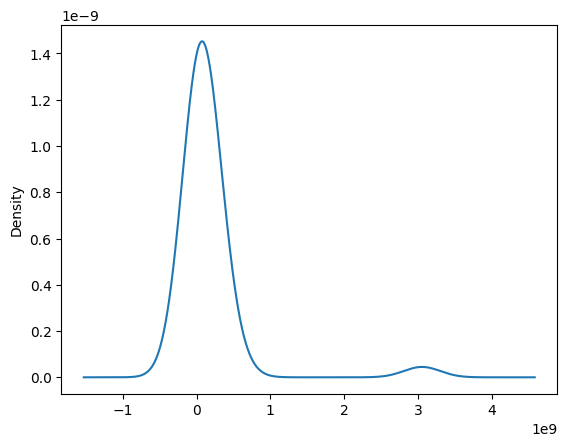

In [21]:
table['Total Literate Persons'].plot.kde()

In [22]:
table['Total Literate Persons'].kurtosis

<bound method NDFrame._add_numeric_operations.<locals>.kurt of Area Name
INDIA                                3054555248
State - ANDAMAN & NICOBAR ISLANDS       1177124
State - ANDHRA PRADESH                202227040
State - ARUNACHAL PRADESH               3064020
State - ASSAM                          76711908
State - BIHAR                         210018212
State - CHANDIGARH                      3221752
State - CHHATTISGARH                   61519688
State - DADRA & NAGAR HAVELI             892920
State - DAMAN & DIU                      753624
State - GOA                             4661948
State - GUJARAT                       164373432
State - HARYANA                        66395952
State - HIMACHAL PRADESH               20158944
State - JAMMU & KASHMIR                28268932
State - JHARKHAND                      73312276
State - KARNATAKA                     162589288
State - KERALA                        112543296
State - LAKSHADWEEP                      210212
State - MADHYA 